In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE =32
IMAGE_SIZE =256
CHANNELS =3
EPOCHS =50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    

(32, 256, 256, 3)
[0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 2 1 0 0 1 1 1 1 1 0 1 1 1]


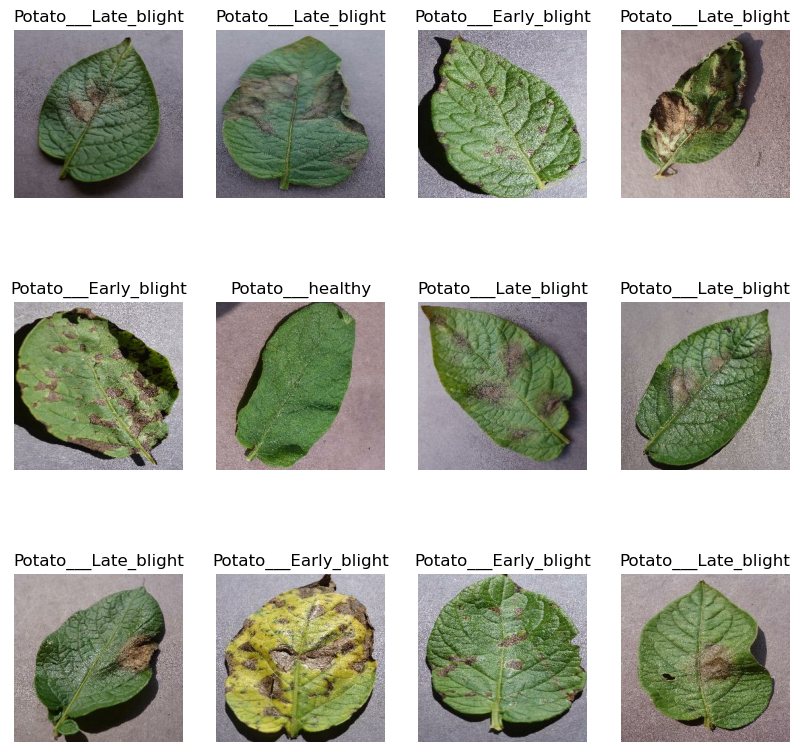

In [6]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(12):
            ax =plt.subplot(3,4,i+1)
        
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(class_names[labels_batch[i]])
            plt.axis("off")

In [7]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds =dataset.skip(54)
len(test_ds)

14

In [10]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    
    ds_size =len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size =int(val_split*ds_size)
    
    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [14]:
len(test_ds)

8

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.62352943 0.6        0.60784316]
  [0.6039216  0.5803922  0.5882353 ]
  [0.5921569  0.5686275  0.5764706 ]
  ...
  [0.67058825 0.6431373  0.67058825]
  [0.6862745  0.65882355 0.6862745 ]
  [0.6666667  0.6392157  0.6666667 ]]

 [[0.5882353  0.5647059  0.57254905]
  [0.627451   0.6039216  0.6117647 ]
  [0.6156863  0.5921569  0.6       ]
  ...
  [0.6666667  0.6392157  0.6666667 ]
  [0.65882355 0.6313726  0.65882355]
  [0.63529414 0.60784316 0.63529414]]

 [[0.62352943 0.6        0.60784316]
  [0.6431373  0.61960787 0.627451  ]
  [0.6156863  0.5921569  0.6       ]
  ...
  [0.654902   0.627451   0.654902  ]
  [0.68235296 0.654902   0.68235296]
  [0.69411767 0.6666667  0.69411767]]

 ...

 [[0.5176471  0.47843137 0.4745098 ]
  [0.52156866 0.48235294 0.47843137]
  [0.5254902  0.4862745  0.48235294]
  ...
  [0.6039216  0.5686275  0.5803922 ]
  [0.62352943 0.5882353  0.6       ]
  [0.65882355 0.62352943 0.63529414]]

 [[0.50980395 0.47058824 0.46666667]
  [0.5137255  0.4745098  0.47058824]


In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [21]:
CHANNELS

3

In [22]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50


54/54 [==============================] - 110s 2s/step - loss: 0.9174 - accuracy: 0.4780 - val_loss: 0.8781 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 103s 2s/step - loss: 0.7991 - accuracy: 0.5926 - val_loss: 0.6314 - val_accuracy: 0.7031
Epoch 3/50
54/54 [==============================] - 97s 2s/step - loss: 0.4757 - accuracy: 0.7731 - val_loss: 0.2337 - val_accuracy: 0.9219
Epoch 4/50
54/54 [==============================] - 97s 2s/step - loss: 0.3501 - accuracy: 0.8600 - val_loss: 0.5681 - val_accuracy: 0.7500
Epoch 5/50
54/54 [==============================] - 84s 2s/step - loss: 0.1674 - accuracy: 0.9398 - val_loss: 0.1517 - val_accuracy: 0.9531
Epoch 6/50
54/54 [==============================] - 99s 2s/step - loss: 0.1206 - accuracy: 0.9554 - val_loss: 0.1478 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 97s 2s/step - loss: 0.1169 - accuracy: 0.9583 - val_loss: 0.4767 - val_accuracy: 0.8698
Epoch 8/50
54/54

In [26]:
len(test_ds)

8

In [27]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 15s 694ms/step - loss: 0.0118 - accuracy: 0.9961


In [28]:
scores

[0.011784441769123077, 0.99609375]

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['loss']

[0.9174396991729736,
 0.7991425395011902,
 0.4757215976715088,
 0.35009631514549255,
 0.1674494445323944,
 0.12055853754281998,
 0.1169431284070015,
 0.10010823607444763,
 0.0757608488202095,
 0.0705762729048729,
 0.06946441531181335,
 0.06400422751903534,
 0.04763650894165039,
 0.07109829038381577,
 0.048428718000650406,
 0.04634854570031166,
 0.2573467791080475,
 0.1432098150253296,
 0.07631620019674301,
 0.08923088014125824,
 0.043043095618486404,
 0.031456634402275085,
 0.03126509487628937,
 0.06253904849290848,
 0.06344340741634369,
 0.04191923886537552,
 0.028975632041692734,
 0.025561710819602013,
 0.017431125044822693,
 0.012324432842433453,
 0.02303100936114788,
 0.04483458399772644,
 0.02727006934583187,
 0.02040545456111431,
 0.03434811159968376,
 0.025880642235279083,
 0.03458767756819725,
 0.02678065560758114,
 0.020248770713806152,
 0.02447577938437462,
 0.03943362087011337,
 0.029511980712413788,
 0.019129298627376556,
 0.0196624007076025,
 0.08070531487464905,
 0.040912

In [32]:
history.history['accuracy']

[0.47800925374031067,
 0.5925925970077515,
 0.7731481194496155,
 0.8599537014961243,
 0.9398148059844971,
 0.9554398059844971,
 0.9583333134651184,
 0.9635416865348816,
 0.9710648059844971,
 0.9751157164573669,
 0.9699074029922485,
 0.9785879850387573,
 0.9849537014961243,
 0.9756944179534912,
 0.9837962985038757,
 0.9832175970077515,
 0.8987268805503845,
 0.9490740895271301,
 0.9710648059844971,
 0.9710648059844971,
 0.9832175970077515,
 0.9884259104728699,
 0.9878472089767456,
 0.9785879850387573,
 0.9756944179534912,
 0.9837962985038757,
 0.9918981194496155,
 0.9907407164573669,
 0.9936342835426331,
 0.9971064925193787,
 0.9907407164573669,
 0.9814814925193787,
 0.9924768805503845,
 0.9907407164573669,
 0.9884259104728699,
 0.9907407164573669,
 0.984375,
 0.9924768805503845,
 0.9953703880310059,
 0.9907407164573669,
 0.9849537014961243,
 0.9901620149612427,
 0.9953703880310059,
 0.9907407164573669,
 0.9751157164573669,
 0.9861111044883728,
 0.9947916865348816,
 0.9826388955116272,
 

In [33]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

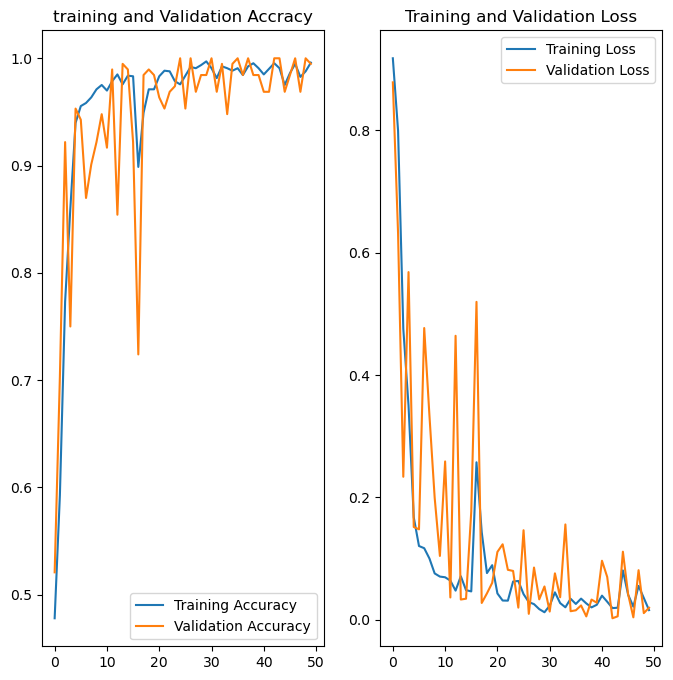

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Early_blight


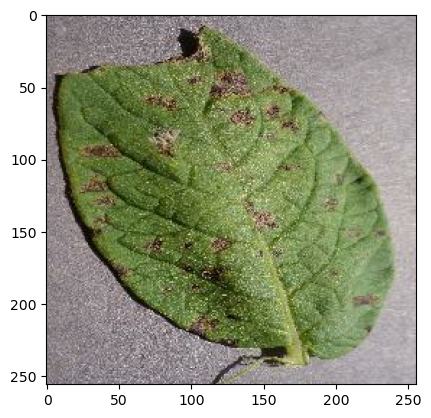

In [35]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype("uint8")
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    
    batch_prediction =model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions =model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence =round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 82ms/step


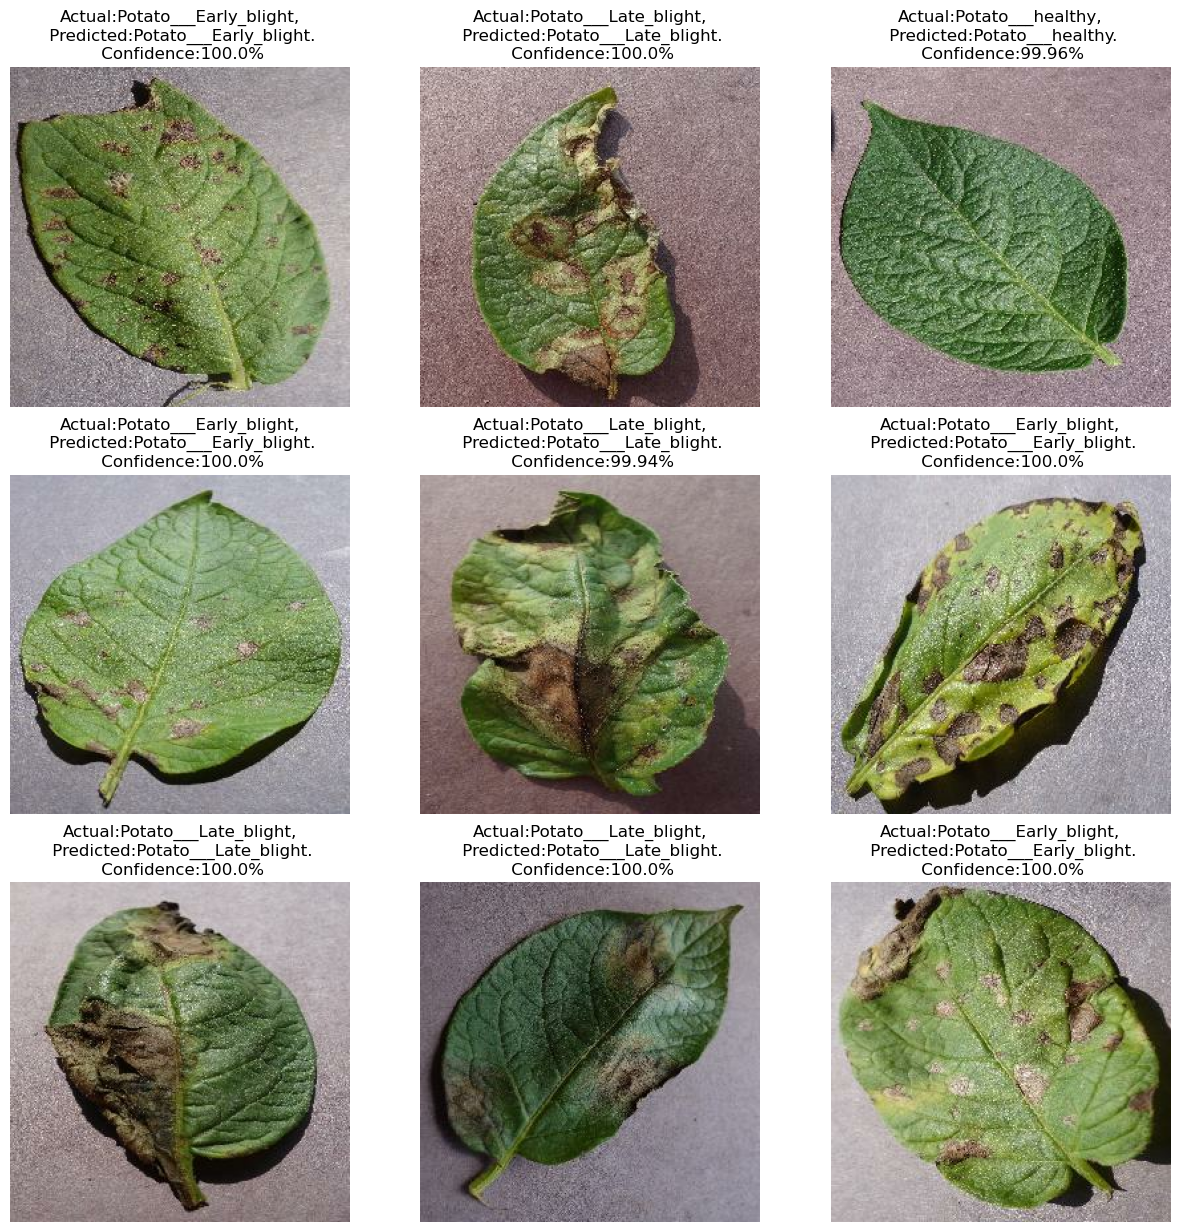

In [37]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence =predict(model,images[i].numpy())
        
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [38]:
import os
model_version= max([int(i) for i in (os.listdir("../models")+[0])])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
